In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, \
                                LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import category_encoders as ce
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
# Load dataset
cols = ["age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
"capital_gain", "capital_loss", "hours_per_week", \
                                "native_country", "income"]

df = pd.read_csv("adult_income.csv", header=None, names=cols, \
                              na_values="?", skipinitialspace=True)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# Drop all NaN values
df = df.dropna()
df.shape

(30162, 15)

In [13]:
# -------------------------
# Separate features & target
# -------------------------
y = (df["income"] == ">50K").astype(int)  # binary target 0/1
X = df.drop("income", axis=1)

In [ ]:
a

In [15]:
# -------------------------
# Define columns
# -------------------------
num_cols = ["age", "fnlwgt", "education_num", "capital_gain", \
                     "capital_loss", "hours_per_week"]
low_card_cat = ["sex", "race", "relationship"]
high_card_cat = ["workclass", "education", "marital_status",\
                 "occupation", "native_country"]

In [23]:
for x in high_card_cat:
    print(x, "has", df[x].nunique(), "categories")

workclass has 7 categories
education has 16 categories
marital_status has 7 categories
occupation has 14 categories
native_country has 41 categories


In [25]:
# -------------------------
# Preprocess numerical columns
# -------------------------
scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols])

In [27]:
# -------------------------
# Preprocess low-cardinality categorical columns (One-Hot)
# -------------------------
ohe = OneHotEncoder(sparse_output=False, \
                       handle_unknown="ignore")
X_low_cat = ohe.fit_transform(X[low_card_cat])

In [29]:
# -------------------------
# Preprocess high-cardinality categorical columns (Target Encoding)
# -------------------------
encoder = ce.TargetEncoder(cols=high_card_cat)
X_high_cat = encoder.fit_transform(X[high_card_cat],\
                                y).values             # convert to numpy array


In [26]:
# -------------------------
# Combine all features
# -------------------------
X_final = np.hstack([X_num, X_low_cat, X_high_cat])

# -------------------------
# Train/Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X_final, y, \
                                        test_size=0.2, random_state=42)


In [28]:
# -------------------------
# Build Neural Network
# -------------------------
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# -------------------------
# Train Model
# -------------------------
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=64, verbose=1)


Epoch 1/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7805 - loss: 0.4620 - val_accuracy: 0.8473 - val_loss: 0.3307
Epoch 2/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8355 - loss: 0.3510 - val_accuracy: 0.8478 - val_loss: 0.3232
Epoch 3/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8426 - loss: 0.3430 - val_accuracy: 0.8483 - val_loss: 0.3212
Epoch 4/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8458 - loss: 0.3304 - val_accuracy: 0.8500 - val_loss: 0.3225
Epoch 5/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8447 - loss: 0.3309 - val_accuracy: 0.8495 - val_loss: 0.3198
Epoch 6/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8458 - loss: 0.3290 - val_accuracy: 0.8488 - val_loss: 0.3198
Epoch 7/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8470 - loss: 0.3278 - val_accuracy: 0.8488 - val_loss: 0.3209
Epoch 8/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8456 - loss: 0.3288 - val_accuracy: 0.

In [32]:

# -------------------------
# Evaluate Model
# -------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.8528


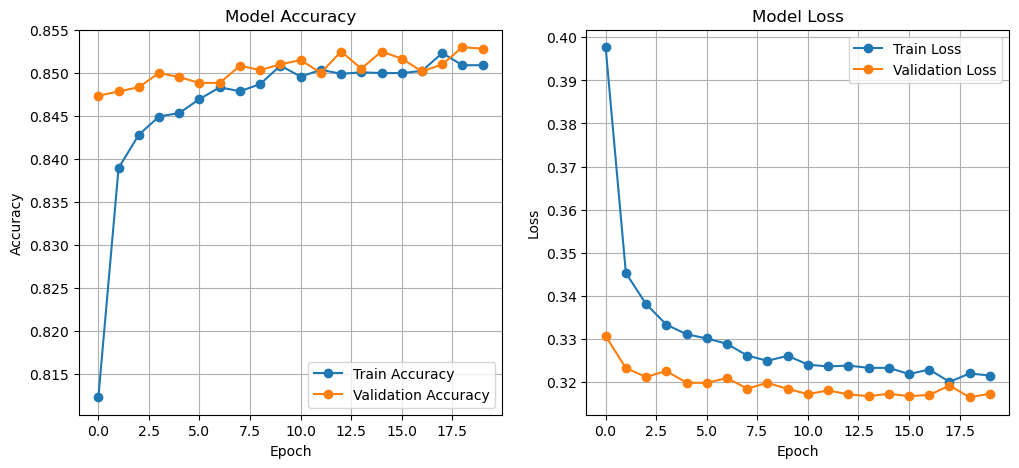

In [34]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12,5))

    # Accuracy plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

# Call the function
plot_training_history(history)
